# Movies Sucess Prediction

### Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading the data

In [2]:
df = pd.read_csv('C:\\Users\\dell\\Downloads\\Compressed\\archive\\TMDB_movie_dataset_v11.csv')
df.info()
df.shape
df.columns
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149258 entries, 0 to 1149257
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1149258 non-null  int64  
 1   title                 1149245 non-null  object 
 2   vote_average          1149258 non-null  float64
 3   vote_count            1149258 non-null  int64  
 4   status                1149258 non-null  object 
 5   release_date          956813 non-null   object 
 6   revenue               1149258 non-null  int64  
 7   runtime               1149258 non-null  int64  
 8   adult                 1149258 non-null  bool   
 9   backdrop_path         303907 non-null   object 
 10  budget                1149258 non-null  int64  
 11  homepage              121445 non-null   object 
 12  imdb_id               605866 non-null   object 
 13  original_language     1149258 non-null  object 
 14  original_title        1149245 non-

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### Checking the Nulls

In [3]:
print(df.isnull().sum())

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             192445
revenue                       0
runtime                       0
adult                         0
backdrop_path            845351
budget                        0
homepage                1027813
imdb_id                  543392
original_language             0
original_title               13
overview                 235122
popularity                    0
poster_path              365351
tagline                  988185
genres                   462714
production_companies     631991
production_countries     511732
spoken_languages         492082
keywords                 839391
dtype: int64


### Dropping Unncecessary Columns

In [4]:
df.drop(columns=['id' , 'backdrop_path' , 'original_title' , 'poster_path' , 'tagline'], inplace=True)
print("\nAfter dropping columns")
print(df.shape)
print(df.isnull().sum())



After dropping columns
(1149258, 19)
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             192445
revenue                       0
runtime                       0
adult                         0
budget                        0
homepage                1027813
imdb_id                  543392
original_language             0
overview                 235122
popularity                    0
genres                   462714
production_companies     631991
production_countries     511732
spoken_languages         492082
keywords                 839391
dtype: int64


### Filtering the Data

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Filter rows with dates between 1975 and 2024
df = df[(df['release_date'] >= '1990-01-01') & (df['release_date'] <= '2024-12-31')]

print(df.shape)

(715039, 19)


#### Droping the Nulls

In [6]:
print(df.isnull().sum())
df.dropna(inplace=True)


title                        4
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
budget                       0
homepage                617521
imdb_id                 345665
original_language            0
overview                115767
popularity                   0
genres                  249645
production_companies    366643
production_countries    284554
spoken_languages        262743
keywords                497968
dtype: int64


In [7]:
print(df.isnull().sum())
df.shape

title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
homepage                0
imdb_id                 0
original_language       0
overview                0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
keywords                0
dtype: int64


(23683, 19)

In [8]:
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

## Feature Engineering

In [9]:
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
df['season'] = df['release_month'].map(season_mapping)

In [10]:
df['genre_combination'] = df['genres'].apply(lambda x: tuple(sorted(x.split(','))) if pd.notnull(x) else ())
genre_popularity = df.groupby('genre_combination')['revenue'].transform('mean')
df['genre_combination_popularity'] = genre_popularity.fillna(0)

In [11]:
print("Top 10 genre combinations by popularity:")
print(df.groupby('genre_combination')['genre_combination_popularity'].mean().sort_values(ascending=False).head(10))

Top 10 genre combinations by popularity:
genre_combination
( Fantasy,  Romance, Family)                                    1.266116e+09
( Action,  Science Fiction, Adventure)                          1.030856e+09
( Action,  Comedy,  Fantasy, Adventure)                         9.953391e+08
( Adventure,  Comedy,  Drama,  Family, Animation)               8.576112e+08
( Action,  Adventure,  Family,  Romance, Fantasy)               7.585398e+08
( Adventure,  Thriller, Science Fiction)                        7.553567e+08
( Drama,  Fantasy,  Romance, Adventure)                         6.984913e+08
( Adventure,  Fantasy, Science Fiction)                         6.943947e+08
( Action,  Adventure,  Animation,  Comedy,  Family, Fantasy)    6.215375e+08
( Science Fiction,  Thriller, Adventure)                        6.038731e+08
Name: genre_combination_popularity, dtype: float64


In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract release_year and release_month
df['release_year'] = df['release_date'].dt.year

# Calculate competition year-wise
year_month_counts = df.groupby(['release_year', 'release_month']).size().reset_index(name='competition_count')

# Map competition counts back to the main DataFrame
df = pd.merge(df, year_month_counts, how='left', on=['release_year', 'release_month'])

# Rename the column for clarity
df.rename(columns={'competition_count': 'box_office_competition'}, inplace=True)

In [13]:
print("Top 10 years with the most box office competition:")
print(df[['box_office_competition']])

Top 10 years with the most box office competition:
       box_office_competition
0                          59
1                         141
2                          43
3                          56
4                          81
...                       ...
23678                     114
23679                      11
23680                      98
23681                      74
23682                     109

[23683 rows x 1 columns]


In [14]:
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df['seasons_mapped'] = df['season'].map(season_mapping)

In [51]:
df.to_csv('movies.csv')

## Visualization

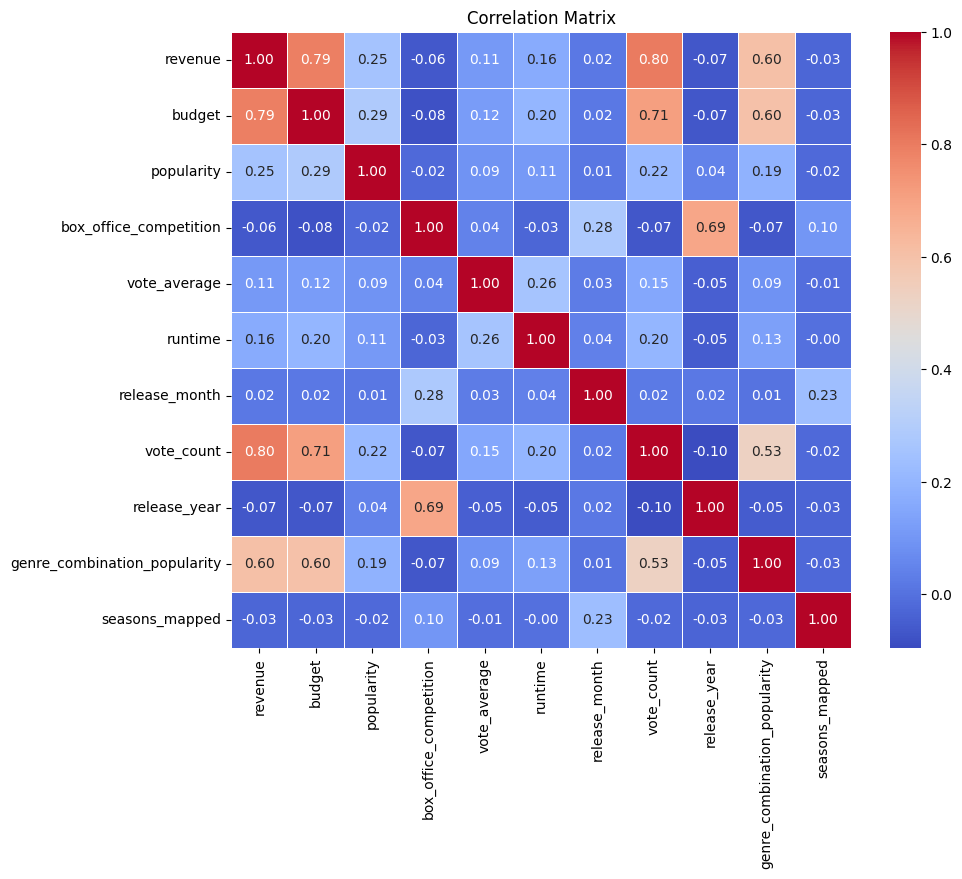

In [27]:
correlation_matrix = df[['revenue' ,'budget', 'popularity', 'box_office_competition', 'vote_average', 'runtime', 
        'release_month', 'vote_count', 'release_year', 'genre_combination_popularity' , 'seasons_mapped']].corr() 

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

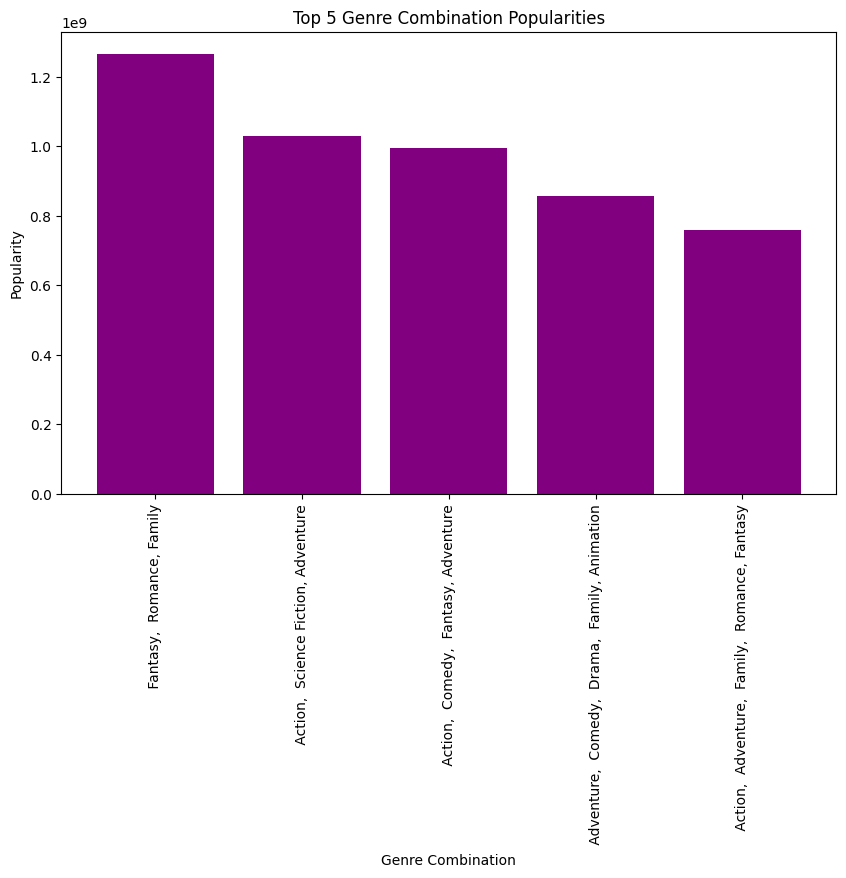

In [34]:
# Sort the DataFrame by 'genre_combination_popularity' in descending order
sorted_df = df.sort_values(by='genre_combination_popularity', ascending=False)

# Get the top 5 genre combinations by popularity
top_5_genres = sorted_df[['genre_combination', 'genre_combination_popularity']].drop_duplicates().head(5)

# Convert tuples to strings for proper plotting
top_5_genres['genre_combination'] = top_5_genres['genre_combination'].apply(lambda x: ', '.join(x))

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(top_5_genres['genre_combination'], top_5_genres['genre_combination_popularity'], color='purple')
plt.xlabel('Genre Combination')
plt.ylabel('Popularity')
plt.title('Top 5 Genre Combination Popularities')
plt.xticks(rotation=90)

plt.show()

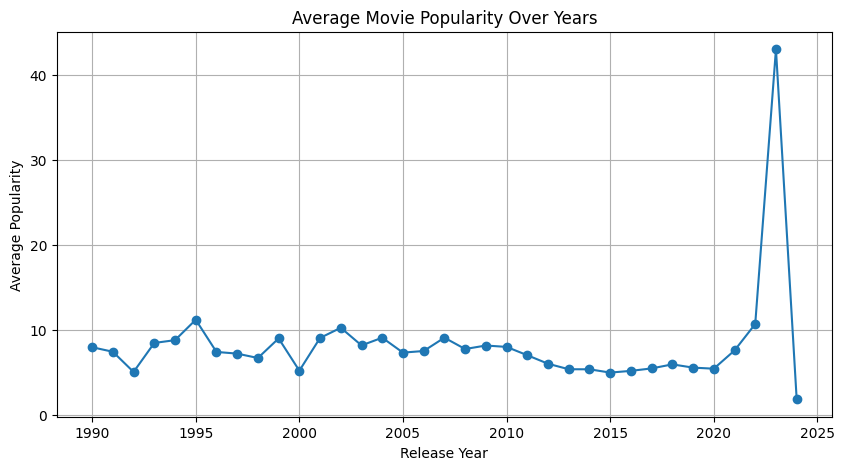

In [22]:
# Group by release year and calculate mean popularity
popularity_trend = df.groupby('release_year')['popularity'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(popularity_trend.index, popularity_trend.values, marker='o')
plt.title('Average Movie Popularity Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()


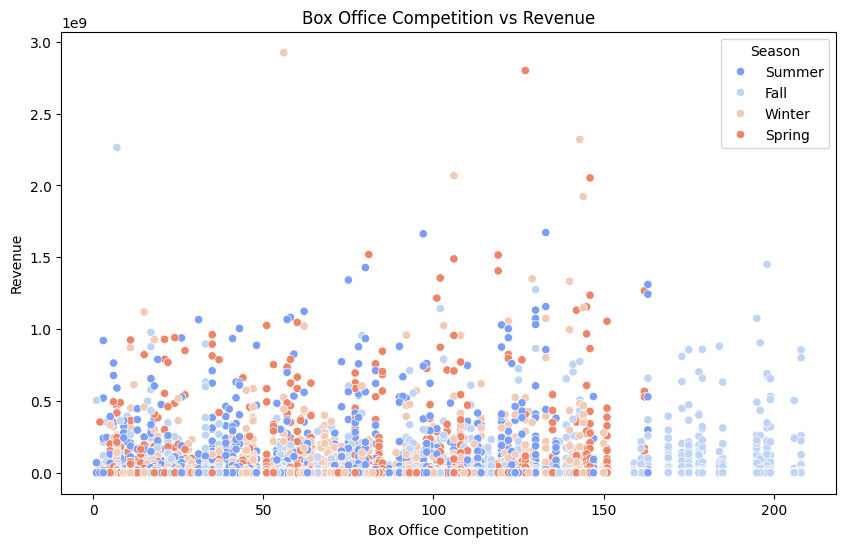

In [23]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='box_office_competition', y='revenue', hue='season', palette='coolwarm')
plt.title('Box Office Competition vs Revenue')
plt.xlabel('Box Office Competition')
plt.ylabel('Revenue')
plt.legend(title='Season')
plt.show()


### Insights from the Graph

1. **Revenue Distribution:**  
   Movies with lower box office competition often show a wider range of revenue. However, even under high competition, some movies perform well.

2. **Seasonal Patterns:**  
   Some seasons, like Summer, tend to have outliers with exceptionally high revenue, indicating blockbuster releases.

3. **Competition vs Revenue:**  
   There doesn't seem to be a strong correlation between competition and revenue, but clustering suggests patterns specific to seasons or competition levels.



C:\Users\dell\AppData\Local\Temp\ipykernel_19760\1557989573.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_popularity, x='season', y='popularity', hue=None, palette='Set3')


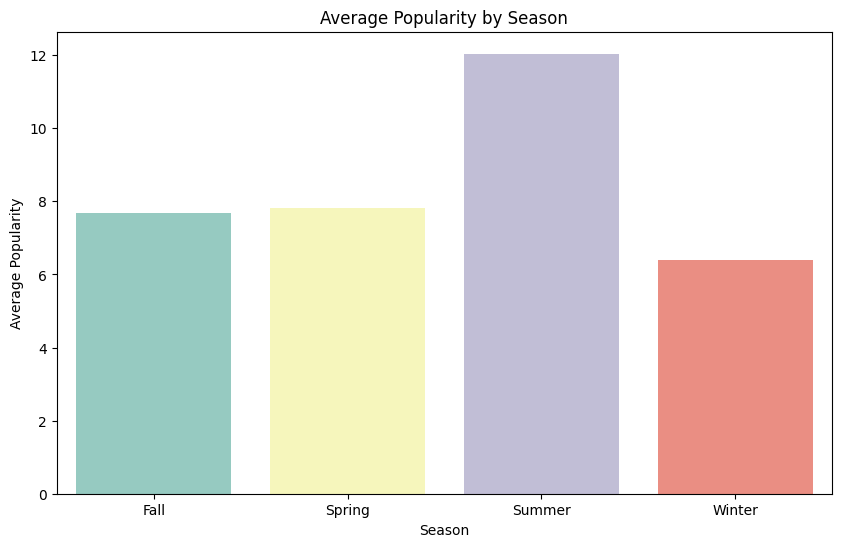

In [ ]:
# Group by 'season' and calculate the mean popularity for each season
season_popularity = df.groupby('season')['popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=season_popularity, x='season', y='popularity', hue=None, palette='Set3')
plt.title('Average Popularity by Season')
plt.xlabel('Season')
plt.ylabel('Average Popularity')
plt.show()

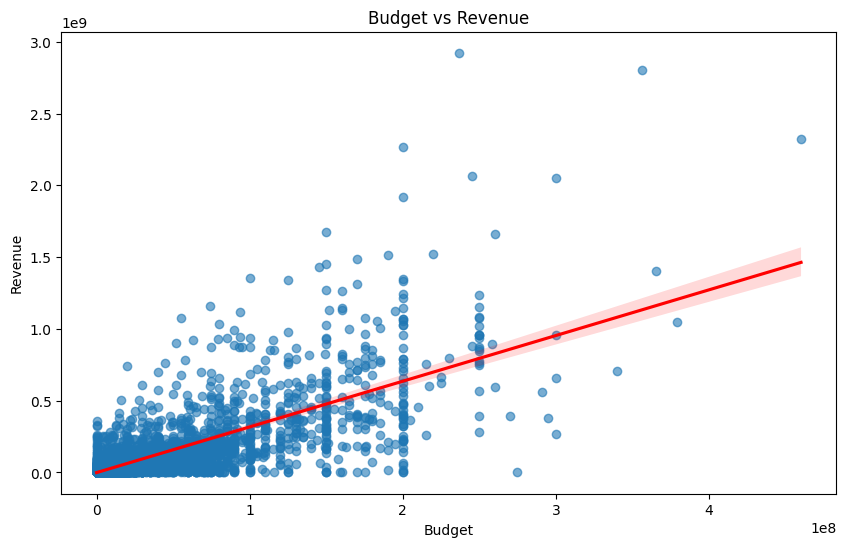

In [35]:
# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='budget', y='revenue', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


##### Some dots are far from the line, meaning some low-budget movies made a lot of money, and some high-budget movies didn’t make as much.

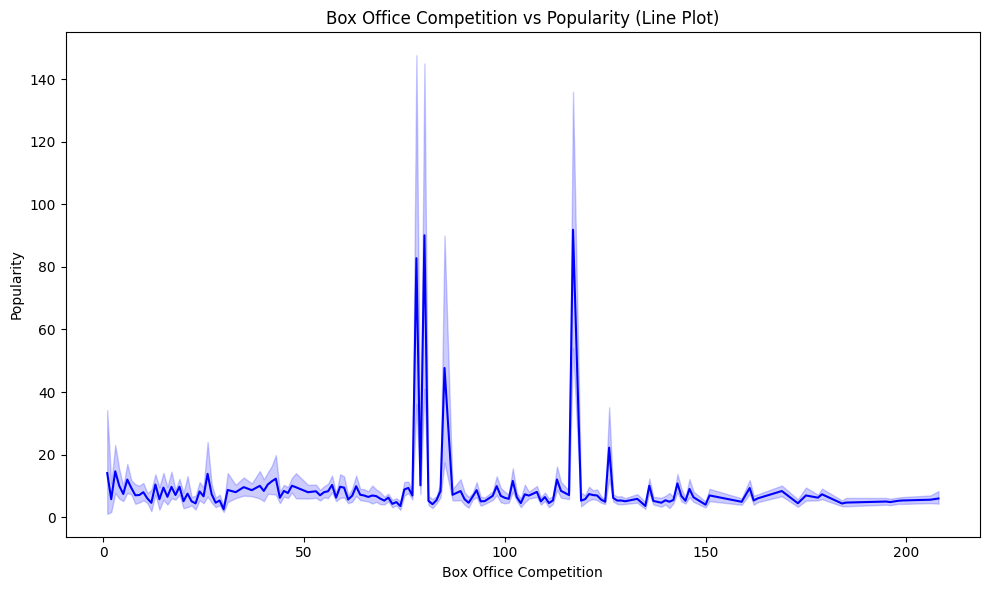

In [41]:
# Create a Line Plot: Box office competition vs Popularity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='box_office_competition', y='popularity', color='blue')
plt.title('Box Office Competition vs Popularity (Line Plot)')
plt.xlabel('Box Office Competition')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

#### There are some sharp spikes in popularity, suggesting that certain movies became extremely popular even in competitive box office environments.

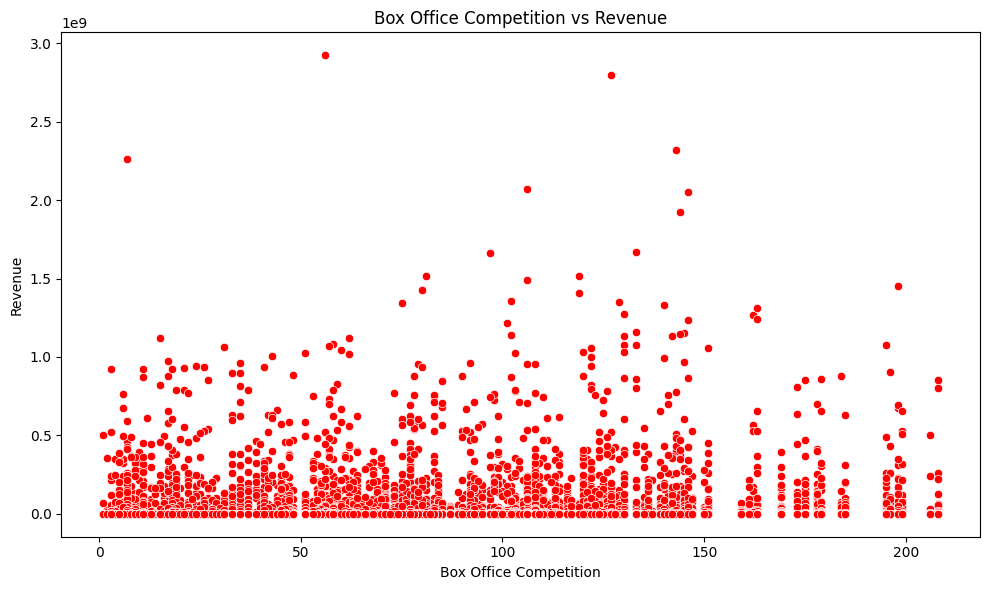

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='box_office_competition', y='revenue', color='red')
plt.title('Box Office Competition vs Revenue')
plt.xlabel('Box Office Competition')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

1. The dots are spread out, with most movies having low to moderate revenue, regardless of competition.
2. A few movies earned very high revenues (outliers) even in competitive environments.
3. Overall, there’s no clear pattern suggesting that higher competition consistently reduces revenue.

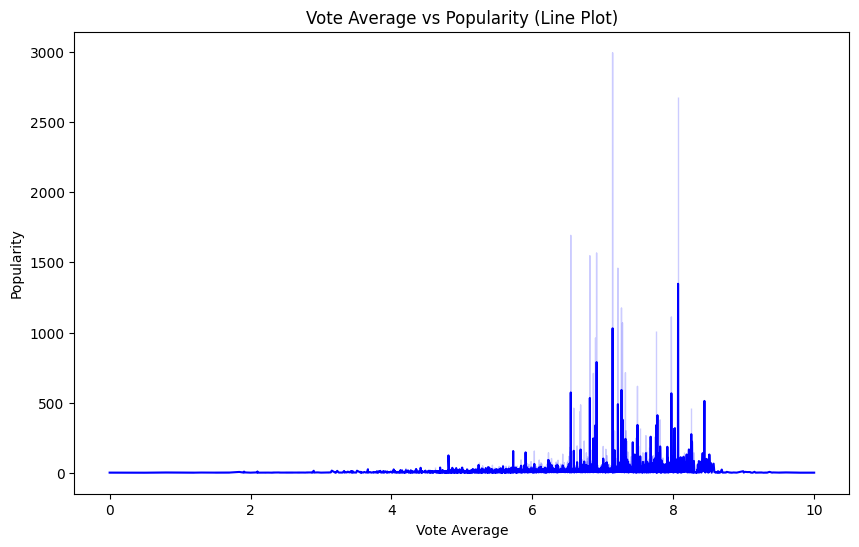

In [26]:
# Plot with a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.sort_values('vote_average'), x='vote_average', y='popularity', color='b')
plt.title('Vote Average vs Popularity (Line Plot)')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()



## Model Fitting

#### Basic Models

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = df[['budget', 'popularity', 'box_office_competition', 'vote_average', 'runtime', 'release_month', 'vote_count', 'release_year' , 'genre_combination_popularity' , 'seasons_mapped']]  # Add more relevant features
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Train the models
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the models
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Linear Regression:
Mean Squared Error: 2571394850203380.5
R2 Score: 0.7160621750424723

Decision Tree Regressor:
Mean Squared Error: 3369794353679795.5
R2 Score: 0.6279015339622689

Random Forest Regressor:
Mean Squared Error: 1806150372455602.0
R2 Score: 0.8005617813768622


#### XGboost

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Define the features and target variable
X = df[['budget', 'popularity', 'box_office_competition', 'vote_average', 'runtime', 'release_month', 'vote_count', 'release_year', 'genre_combination_popularity' , 'seasons_mapped']]
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)
xg_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xg = xg_reg.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xg))
print("R2 Score:", r2_score(y_test, y_pred_xg))


XGBoost Regressor:
Mean Squared Error: 3875028612626629.5
R2 Score: 0.5721126794815063


#### Basic Models

In [55]:
from sklearn.preprocessing import MinMaxScaler , RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print(df.shape)
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df['seasons_mapped'] = df['season'].map(season_mapping)


# Define the features and target variable
X = df[['budget', 'seasons_mapped' ,  'popularity', 'box_office_competition', 'vote_average', 'runtime', 'release_month', 'vote_count', 'release_year', 'genre_combination_popularity']]  # Add more relevant features
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Train the models
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the models
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))




(23683, 27)
Linear Regression:
Mean Squared Error: 2571394850203379.5
R2 Score: 0.7160621750424723

Decision Tree Regressor:
Mean Squared Error: 3606043875113344.0
R2 Score: 0.6018144570367656

Random Forest Regressor:
Mean Squared Error: 1800680714296664.2
R2 Score: 0.8011657504019956


#### Gradient Boost

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = df[['budget', 'popularity', 'box_office_competition', 'vote_average', 'runtime', 
        'release_month', 'vote_count', 'release_year', 'genre_combination_popularity' , 'seasons_mapped']]  # Add more relevant features
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Regressor with the provided hyperparameters
gb = GradientBoostingRegressor(
    learning_rate=0.05, 
    max_depth=5, 
    min_samples_split=2, 
    n_estimators=100, 
    subsample=0.8,
    random_state=42
)

# Train the model
gb.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_gb = gb.predict(X_test_scaled)

# Evaluate the model on the test data
mse = mean_squared_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

# Output the evaluation metrics
print("Gradient Boosting Regressor with Specified Hyperparameters:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Gradient Boosting Regressor with Specified Hyperparameters:
Mean Squared Error: 1879612525591575.5
R2 Score: 0.7924499645641019


#### Model with stacking Random Forest and Gradient Boost

In [38]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# Define the features and target variable, including the mapped 'seasons' column
X = df[['budget', 'popularity', 'box_office_competition', 'vote_average', 'runtime', 
        'release_month', 'vote_count', 'release_year', 'genre_combination_popularity', 'seasons_mapped']]
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Robust Scaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids for GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize base models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Apply GridSearchCV for RandomForest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_scaled, y_train)
rf = rf_grid_search.best_estimator_

# Apply GridSearchCV for GradientBoosting
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train_scaled, y_train)
gb = gb_grid_search.best_estimator_

# Initialize the stacking regressor with base models and a meta-model
stack_reg = StackingRegressor(
    estimators=[('rf', rf), ('gb', gb)],
    final_estimator=LinearRegression()
)

# Train the stacking regressor
stack_reg.fit(X_train_scaled, y_train)


# Make predictions
y_pred_stack = stack_reg.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_stack)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_stack)

# Calculate errors
errors = y_test - y_pred_stack
min_error = errors.min()
max_error = errors.max()

# Print evaluation metrics
print("Stacking Regressor:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2_score(y_test, y_pred_stack)}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Stacking Regressor:
Mean Squared Error (MSE): 82791158.96972933
Root Mean Squared Error (RMSE): 9098.964719666152
Mean Absolute Error (MAE): 5870386.58504201
R2 Score: 0.9216027380877131


### Evaluation Visualization

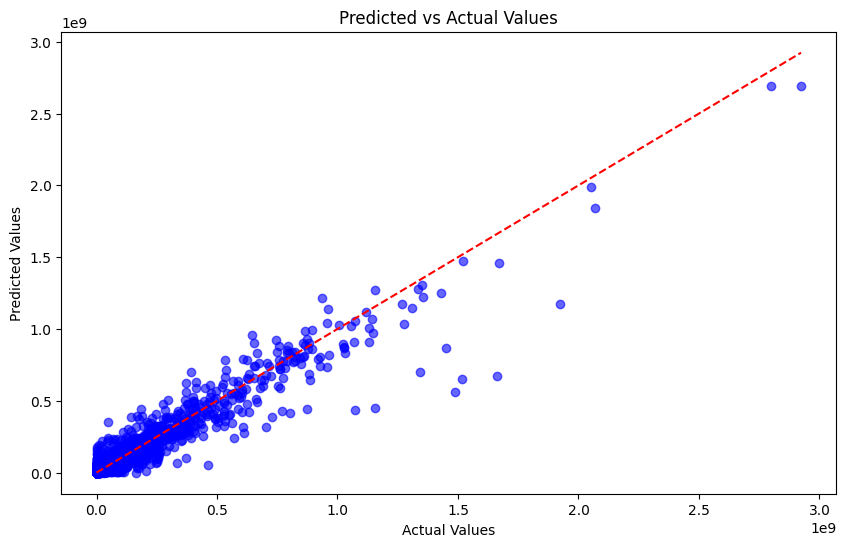

In [36]:
residuals = y_test - y_pred_stack

# Plot Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stack, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()